## **Definição do problema**

**Descrição**

Embora muitas pessoas tenham sido acometidas pelo covid-19, parece que alguns grupos de pacientes foram mais afetados do que outros, por diferentes motivos. Neste trabalho, será estudada a relação entre o número de infecções e óbitos pelo covid-19 e a cor da pele das pessoas infectadas. 


**Tipo de problema** 

Esse problema é de aprendizado não supervisionado, pois o algoritmo não recebe os resultados esperados durante o treinamento, precisando identificar regularidades entre os dados.

**Hipótese**

Pessoas afrodescendentes podem ter sido mais afetadas pelo covid-19 do que pessoas brancas.

**Restrições e condições**

Neste trabalho, os dados utilizados foram disponibilizados pela Fundação SEADE, referentes a vítimas de covid-19 do estado de São Paulo: https://repositorio.seade.gov.br/dataset/covid-19/resource/a730d5c1-7899-4455-8649-68e7e8cc1753


**Atributos do dataset** 

As definições *dos* atributos a seguir também estão disponíveis em https://repositorio.seade.gov.br/dataset/covid-19/resource/f9692def-0c04-4329-8cf9-d1ebbc35c840

1. codigo_ibge: código numérico do município no IBGE (7 dígitos) de residência do paciente
2. nome_munic: nome do município de residência do paciente
3. nome_drs: nome do departamento regional da saúde de residência do paciente
4. obito: indica se o paciente veio a óbito por covid-19
5. raca_cor: cor ou raça do paciente
6. idade: idade do paciente
7. cs_sexo sexo do paciente
8. diagnostico_covid19: confirmação de covid-19
9. asma: paciente tem asma
10. cardiopatia: paciente tem cardiopatia
11. diabetes: paciente tem diabetes
12. doenca_hematologica: paciente tem doença hematológica
13. doenca_hepatica: paciente tem doença hepática
14. doenca_neurologica: paciente tem doença neurológica
15. doenca_renal: paciente tem doença renal
16. imunodepressao: paciente tem imunodepressão
17. obesidade: paciente tem obesidade
18. pneumopatia: paciente tem pneumopatia
19. puerpera: paciente é puérpera
20. sindrome_de_down: paciente tem síndrome de down

## **Análise de dados**

**Estatísticas descritivas**

Há 20 atributos e, desconsiderando a primeira linha do csv (nome dos atributos), há 6578135 instâncias, conforme mostrado abaixo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = "https://media.githubusercontent.com/media/anttoniol/pucrio_ds_sprint1/main/casos_obitos_raca_cor.csv"
dataframe = pd.read_csv(url, sep = ";")
len(dataframe.index)

In [ ]:
original_dataframe = dataframe.copy()

Segundo o dicionário de variáveis disponibilizado pela Fundação SEADE em https://repositorio.seade.gov.br/dataset/covid-19/resource/f9692def-0c04-4329-8cf9-d1ebbc35c840 , o tipo de dados dos atributos se divide em:

1. Numérico: codigo_ibge, obito e idade
2. Texto: restante dos atributos

Observando apenas as 10 primeiras linhas, nota-se que o valor para o atributo "raca_cor" está como "IGNORADO" na maioria das instâncias. 

Além disso, para atributos como "cardiopatia" e "diabetes", há um valor numérico que, aparentemente, permite mais de uma interpretação, com base apenas no dicionário de variáveis disponibilizado pela Fundação SEADE. Por exemplo, na primeira linha, o valor "9" na coluna "cardiopatia" pode significar que, dentro de alguma escala (que não foi encontrada durante a realização deste trabalho), o fator de risco é 9, ou que o paciente possui 9 doenças pertencentes ao grupo de cardiopatias. Assim, a interpretação desses valores não é única.

In [ ]:
dataframe.head(10)

Neste trabalho, diferentemente do que é informado no dicionário de variáveis, decidiu-se considerar o atributo "obito" como do tipo booleano, em que "true" significa que o paciente faleceu, e "false" caso contrário. 

Além disso, decidiu-se considerar o atributo "codigo_ibge" como uma variável qualitativa, embora ele seja do tipo numérico, pois esse atributo não representa uma quantidade de algo, mas sim um identificador de um município.

Manteve-se o tipo do atributo "idade" como numérico.

Os atributos restantes foram considerados como do tipo numérico, embora o dicionário de variáveis informe que eles sejam do tipo texto. Essa decisão é devido ao fato de os valores desses atributos serem numéricos.

A seguir, está o resumo estatístico das variáveis do tipo numérico, com exceção do "codigo_ibge". 

In [ ]:
indexes = ["idade", "asma", "cardiopatia", "diabetes", "doenca_hematologica", 
          "doenca_hepatica", "doenca_neurologica", "doenca_renal", 
          "imunodepressao", "obesidade", "pneumopatia", "puerpera", 
          "sindrome_de_down"]
          
columns = ["minimo", "maximo", "mediana", "moda", "media", "desvio_padrao",
           "qtde_valores_ausentes"]


stat_dataframe = pd.DataFrame(index = indexes, columns = columns)

In [ ]:
numeric_dataframe = dataframe.loc[:, indexes]

for column in numeric_dataframe.columns:
  stat_attribute = list()
  stat_attribute.append(numeric_dataframe[column].min()) # Valor mínimo
  stat_attribute.append(numeric_dataframe[column].max()) # Valor máximo
  stat_attribute.append(numeric_dataframe[column].median()) # Valor mediano
  stat_attribute.append(numeric_dataframe[column].mode().values) # Moda
  stat_attribute.append(numeric_dataframe[column].mean()) # Valor médio
  stat_attribute.append(numeric_dataframe[column].std()) # Desvio padrão
  stat_attribute.append(numeric_dataframe[column].isna().sum()) # Quantidade de valores ausentes 

  stat_dataframe.loc[column] = stat_attribute.copy()

stat_dataframe

Percebe-se que as idades mínima e máxima não fazem sentido, pois nenhuma pessoa possui uma idade negativa e nenhuma pessoa vive por 2188 anos. 

## **Visualizações**

A seguir, está a distribuição de valores para cada atributo do _dataset_.

In [ ]:
def get_frequency(dataframe, column_name, dropna = True):
  freq = dataframe[column_name].value_counts(dropna = dropna)
  indexes_list = freq.index.values.tolist() 
  values_list = freq.values.tolist()
  return indexes_list, values_list

def get_new_lists(indexes_list, values_list, minimum_ratio = 0.2):
  new_indexes_list = list()
  new_values_list = list()
  freq_others = 0

  indexes_list_size = len(indexes_list)
  sum_values = sum(values_list)

  for i in range(indexes_list_size):
    if values_list[i] / sum_values >= minimum_ratio:
      new_indexes_list.append(str(indexes_list[i]))
      new_values_list.append(values_list[i])
    else:
      freq_others += values_list[i]
  
  if freq_others > 0:
    new_indexes_list.append("Outros")
    new_values_list.append(freq_others)

  return new_indexes_list, new_values_list

def set_axes(axes, x_label, y_label, title):
  axes.set_xlabel(x_label)
  axes.set_ylabel(y_label)
  axes.set_title(title)
  return axes

def generate_horizontal_bar_figure(x_list, y_list, x_label, y_label, title):
  y_pos = np.arange(len(y_list))

  fig, axes = plt.subplots()
  axes.barh(y_pos, x_list, align='center')
  axes.set_yticks(y_pos, labels = y_list)
  axes.invert_yaxis()
  axes = set_axes(axes, x_label, y_label, title)

  plt.show()

def generate_vertical_bar_figure(x_list, y_list, x_label, y_label, title):
  #y_pos = np.arange(len(y_list))

  fig, axes = plt.subplots()
  axes.bar(x_list, y_list, align='center')
  #ax.set_yticks(y_pos, labels = y_list)
  axes = set_axes(axes, x_label, y_label, title)

  plt.show()


In [ ]:
# Código IBGE: frequência

indexes_list, values_list = get_frequency(dataframe, "codigo_ibge")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Código IBGE', 'Código IBGE: frequência')

Percebe-se que o município com código IBGE 3550308 obteve o maior número de infecções pelo covid-19. Segundo dados disponíveis em https://cidades.ibge.gov.br/brasil/sp/sao-paulo/panorama , esse código IBGE corresponde ao município de São Paulo.

In [ ]:
# Nome do município : frequência

indexes_list, values_list = get_frequency(dataframe, "nome_munic")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Nome do município', 'Nome do município: frequência')

Nota-se que o município com o maior número de casos de covid-19 é São Paulo, o que está de acordo com o gráfico gerado para o atributo anterior (codigo_ibge).

In [ ]:
# Nome do DRS : frequência

indexes_list, values_list = get_frequency(dataframe, "nome_drs")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Nome do DRS', 'Nome do DRS: frequência')

Com base no gráfico acima, conclui-se que o Departamento Regional de Saúde (DRS) com maior registro de casos de covid-19 é o do município de São Paulo. 

In [ ]:
# Óbitos : frequência

indexes_list, values_list = get_frequency(dataframe, "obito")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Óbito', 'Óbito: frequência')

Percebe-se, assim, que o número de óbitos foi baixo, comparado com a quantidade de pessoas que resistiram à infecção.

In [ ]:
# Raça/cor : frequência

indexes_list, values_list = get_frequency(dataframe, "raca_cor")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.00025)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Raça/cor', 'Raça/cor: frequência')

Surpreendentemente, a quantidade de pessoas brancas infectadas foi maior se comparada com a quantidade obtida para as outras raças/cores. 

Entretanto, é necessário considerar que os dados se referem aos casos registrados pelas autoridades, mas pode haver subnotificações em que a pessoa infectada não é branca. 

Além disso, no gráfico, há uma quantidade considerável de casos em que a raça/cor está como "ignorado", e as categorias "parda" e "preta" estão divididas em barras diferentes, além de haver uma categoria "outros". 

Seja _X_ a soma da quantidade de pessoas afrodescendentes presentes nas categorias "ignorado", "parda", "preta" e "outros". É possível que, nesse caso, seja menor a diferença entre _X_ e o valor obtido para a categoria "branca".

In [ ]:
# idade: frequência (histograma)

dataframe.hist(column = "idade", bins = list(range(0, 131, 5)))

Percebe-se que a distribuição de valores do atributo "idade" se assemelha a uma distribuição normal centrada em um valor próximo de 40. Assim, sem considerar os valores ausentes, parece que o grupo de pessoas de meia-idade foi mais afetado pela pandemia.

Nesse histograma, os valores mínimo e máximo para a idade são, respectivamente, 0 e 130 pelo motivo mencionado na seção "Estatísticas descritivas".

In [ ]:
# Sexo : frequência

indexes_list, values_list = get_frequency(dataframe, "cs_sexo")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.00025)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Sexo', 'Sexo: frequência')

Observa-se que as mulheres foram mais impactadas pela pandemia do que os homens.

In [ ]:
# Confirmação de covid-19 : frequência

indexes_list, values_list = get_frequency(dataframe, "diagnostico_covid19")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Confirmação de covid-19', 'Confirmação de covid-19: frequência')

Assim, todos os registros no _dataset_ se referem a casos confirmados de covid-19.

In [ ]:
# Asma : frequência

indexes_list, values_list = get_frequency(dataframe, "asma", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Asma', 'Asma: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

In [ ]:
# Cardiopatia : frequência

indexes_list, values_list = get_frequency(dataframe, "cardiopatia", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Cardiopatia', 'Cardiopatia: frequência')

Nota-se que o valor mais frequente é o 9, mas, apenas baseado no dicionário de variáveis, não é possível entender o significado desse valor.

In [ ]:
# Diabetes : frequência

indexes_list, values_list = get_frequency(dataframe, "diabetes", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Diabetes', 'Diabetes: frequência')

Nota-se que o valor mais frequente é o 9, mas, apenas baseado no dicionário de variáveis, não é possível entender o significado desse valor.




In [ ]:
# Doença hematológica : frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_hematologica", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença hematológica', 'Doença hematológica: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

In [ ]:
# Doença hepática : frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_hepatica", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença hepática', 'Doença hepática: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

In [ ]:
# Doença neurológica : frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_neurologica", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença neurológica', 'Doença neurológica: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

In [ ]:
# Doença renal : frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_renal", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença renal', 'Doença renal: frequência')

Nota-se que o valor mais frequente é o 9, mas, apenas baseado no dicionário de variáveis, não é possível entender o significado desse valor.

In [ ]:
# Imunodepressão : frequência

indexes_list, values_list = get_frequency(dataframe, "imunodepressao", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Imunodepressão', 'Imunodepressão: frequência')

Nota-se que o valor mais frequente é o 9, mas, apenas baseado no dicionário de variáveis, não é possível entender o significado desse valor.

In [ ]:
# Obesidade : frequência

indexes_list, values_list = get_frequency(dataframe, "obesidade", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Obesidade', 'Obesidade: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

In [ ]:
# Pneumopatia : frequência

indexes_list, values_list = get_frequency(dataframe, "pneumopatia", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Pneumopatia', 'Pneumopatia: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

In [ ]:
# Puérpera : frequência

indexes_list, values_list = get_frequency(dataframe, "puerpera", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Puérpera', 'Puérpera: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

In [ ]:
# Síndrome de down : frequência

indexes_list, values_list = get_frequency(dataframe, "sindrome_de_down", False)
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Síndrome de down', 'Síndrome de down: frequência')

Percebe-se que os valores ausentes são a maioria para esse atributo.

## **Pré-processamento de dados**

Nesta etapa, serão realizadas algumas operações para melhorar a qualidade dos dados.

### **Substituição de valores** 

**codigo_ibge**

Os valores faltantes serão substituídos pelo valor "DESCONHECIDO":

In [ ]:
def replace_na_values(dataframe, column_name, new_value):
  new_column = dataframe[column_name].fillna(new_value)
  dataframe[column_name] = new_column
  return dataframe



In [ ]:
dataframe_ = replace_na_values(dataframe, "codigo_ibge", "DESCONHECIDO")
dataframe

**nome_munic**

Os valores faltantes serão substituídos pelo valor "DESCONHECIDO":

In [ ]:
dataframe = replace_na_values(dataframe, "nome_munic", "DESCONHECIDO")
dataframe

**nome_drs**

Os valores faltantes serão substituídos pelo valor "DESCONHECIDO":

In [ ]:
dataframe = replace_na_values(dataframe, "nome_drs", "DESCONHECIDO")
dataframe

**obito**

Os valores faltantes serão substituídos pelo valor "DESCONHECIDO". Além disso, para facilitar a compreensão, o valor booleano "False" será substituído por "NÃO"; o valor booleano "True", por "SIM".

In [ ]:
dataframe = replace_na_values(dataframe, "obito", "DESCONHECIDO")
dataframe["obito"].replace(False, "NÃO", inplace = True)
dataframe["obito"].replace(True, "SIM", inplace = True)
dataframe


**raca_cor**

Os valores faltantes serão substituídos pelo valor "DESCONHECIDA". Além disso, os valores "PARDA" e "PRETA" serão substituídos por "AFRODESCENDENTE", para que a hipótese deste trabalho possa ser respondida.


In [ ]:
def replace_string_values(dataframe, column_name, replacement_dict):
  for key in replacement_dict:
    column =  dataframe[column_name].str.replace(key, replacement_dict[key], regex = True)
    dataframe[column_name] = column
  return dataframe

In [ ]:
dataframe = replace_na_values(dataframe, "raca_cor", "DESCONHECIDA")
replacement_dict = {
    "PRETA|PARDA": "AFRODESCENDENTE",
    "NONE": "NENHUMA"
}
dataframe = replace_string_values(dataframe, "raca_cor", replacement_dict)
dataframe

**idade**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos. A mesma coisa será feita para valores menores que -1 ou maiores do que ou iguais a 130.

In [ ]:
median = dataframe["idade"].median()
dataframe = replace_na_values(dataframe, "idade", median)
first_filter = dataframe["idade"] <= -1
second_filter = dataframe["idade"] >= 130
dataframe.loc[first_filter | second_filter, "idade"] = median
dataframe

**cs_sexo**

Os valores faltantes serão substituídos pelo valor "DESCONHECIDO".

In [ ]:
dataframe = replace_na_values(dataframe, "cs_sexo", "DESCONHECIDO")
dataframe

**diagnostico_covid19**

Os valores faltantes serão substituídos pelo valor "DESCONHECIDO".

In [ ]:
dataframe = replace_na_values(dataframe, "diagnostico_covid19", "DESCONHECIDO")
dataframe

**asma**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
def replace_na_values_with_median(dataframe, column_name):
  median = dataframe[column_name].median()
  dataframe = replace_na_values(dataframe, column_name, median)
  return dataframe

In [ ]:
replace_na_values_with_median(dataframe, "asma")

**cardiopatia**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "cardiopatia")

**diabetes**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "diabetes")

**doenca_hematologica**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "doenca_hematologica")

**doenca_hepatica**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "doenca_hepatica")

**doenca_neurológica**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "doenca_neurologica")

**doenca_renal**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "doenca_renal")

**imunodepressao**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "imunodepressao")

**obesidade**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "obesidade")

**pneumopatia**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "pneumopatia")

**puerpera**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "puerpera")

**sindrome_de_down**

Os valores faltantes serão substituídos pela mediana do atributo, para que todos os valores desse atributo sejam numéricos.

In [ ]:
replace_na_values_with_median(dataframe, "sindrome_de_down")

A célula a seguir gera um arquivo csv a partir do dataframe obtido após as substituições de valores. Uma cópia desse arquivo está no repositório, no arquivo "substitution_result.zip".

In [ ]:
dataframe.to_csv("substitution_result.csv", sep = ";", compression = None)

### **Dummy encoding** 

Na versão gratuita do Google Colab, não foi possível obter o dataframe resultante do dummy encoding, e a seguinte mensagem é mostrada:

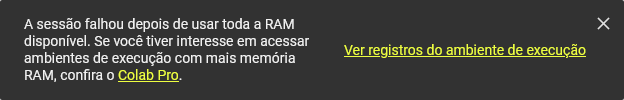

Entretanto, foi possível obter o arquivo csv localmente, utilizando a IDE PyCharm, e o resultado está disponível no repositório deste trabalho, no arquivo "dummy_dataframe.zip".

In [ ]:
""" Descomente o comando a seguir para tentar fazer o dummy encoding no dataset.
O comando abaixo está comentado, para não haver problemas caso as células do notebook 
sejam executadas de uma só vez.
"""

columns = ["nome_munic", "nome_drs", "obito", "raca_cor", "cs_sexo", "diagnostico_covid19"]
# pd.get_dummies(dataframe, columns = columns, drop_first = True)

## **Revisitando a etapa de análise exploratória**

A seguir, está a distribuição dos valores de cada atributo do _dataset_, utilizando o dataframe obtido na etapa de pré-processamento de dados.


In [ ]:
# Código IBGE: frequência

indexes_list, values_list = get_frequency(dataframe, "codigo_ibge")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Código IBGE', 'Código IBGE: frequência')

Não houve mudanças aparentes entre os dois gráficos gerados para esse atributo.

In [ ]:
# Nome do município: frequência

indexes_list, values_list = get_frequency(dataframe, "nome_munic")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Nome do município', 'Nome do município: frequência')

Não houve mudanças aparentes entre os dois gráficos gerados para esse atributo.

In [ ]:
# Nome do DRS : frequência

indexes_list, values_list = get_frequency(dataframe, "nome_drs")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Nome do DRS', 'Nome do DRS: frequência')

Não houve mudanças aparentes entre os dois gráficos gerados para esse atributo.

In [ ]:
# Óbitos : frequência

indexes_list, values_list = get_frequency(dataframe, "obito")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Óbito', 'Óbito: frequência')

Esse histograma está mais compreensível, devido à alteração dos valores booleanos para "SIM" ou "NÃO".

In [ ]:
# Raça/cor : frequência

indexes_list, values_list = get_frequency(dataframe, "raca_cor")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.00025)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Raça/cor', 'Raça/cor: frequência')

Percebe-se a combinação das categorias "PARDA" E "PRETA" em uma só, com o nome "AFRODESCENDENTE", e também a diferença entre a frequência dessa categoria e a frequência da categoria "BRANCA". Conforme dito anteriormente, é possível que haja afrodescendentes categorizados como "IGNORADO" ou "DESCONHECIDA", o que poderia diminuir a diferença entre a frequência de brancos e a de afrodescendentes. 

In [ ]:
# idade: frequência

dataframe.hist(column = "idade", bins = 15)

Agora há apenas valores positivos e menores que 130, o que parece fazer mais sentido.

In [ ]:
# Sexo : frequência

indexes_list, values_list = get_frequency(dataframe, "cs_sexo")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.00025)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Sexo', 'Sexo: frequência')

Não houve mudanças aparentes entre os dois gráficos gerados para esse atributo.

In [ ]:
# Confirmação de covid-19 : frequência

indexes_list, values_list = get_frequency(dataframe, "diagnostico_covid19")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Confirmação de covid-19', 'Confirmação de covid-19: frequência')

Não houve mudanças aparentes entre os dois gráficos gerados para esse atributo.

In [ ]:
# Asma: frequência

indexes_list, values_list = get_frequency(dataframe, "asma")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Asma', 'Asma: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Cardiopatia: frequência

indexes_list, values_list = get_frequency(dataframe, "cardiopatia")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Cardiopatia', 'Cardiopatia: frequência')

Observa-se que valor 9 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Diabetes: frequência

indexes_list, values_list = get_frequency(dataframe, "diabetes")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Diabetes', 'Diabetes: frequência')

Observa-se que valor 9 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Doença hematológica: frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_hematologica")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença hematológica', 'Doença hematológica: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Doença hepática: frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_hepatica")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença hepática', 'Doença hepática: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Doença neurológica: frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_neurologica")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença neurológica', 'Doença neurológica: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Doença renal: frequência

indexes_list, values_list = get_frequency(dataframe, "doenca_renal")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Doença renal', 'Doença renal: frequência')

Observa-se que valor 9 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Imunodepressão: frequência

indexes_list, values_list = get_frequency(dataframe, "imunodepressao")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Imunodepressão', 'Imunodepressão: frequência')

Observa-se que valor 9 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Obesidade: frequência

indexes_list, values_list = get_frequency(dataframe, "obesidade")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Obesidade', 'Obesidade: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Pneumopatia: frequência

indexes_list, values_list = get_frequency(dataframe, "pneumopatia")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Pneumopatia', 'Pneumopatia: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Puérpera: frequência

indexes_list, values_list = get_frequency(dataframe, "puerpera")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Puérpera', 'Puérpera: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

In [ ]:
# Síndrome de down: frequência

indexes_list, values_list = get_frequency(dataframe, "sindrome_de_down")
new_indexes_list, new_values_list = get_new_lists(indexes_list, values_list, 0.01)
generate_horizontal_bar_figure(new_values_list, new_indexes_list, 'Frequência', 'Síndrome de down', 'Síndrome de down: frequência')

Observa-se que valor 2 é predominante, embora não seja possível entender o significado desse valor com base apenas no dicionário de variáveis.

## **Conclusão preliminar**

Com os dados obtidos até agora, ainda não é possível concluir, com base apenas no _dataset_, que os afrodescentes foram mais impactados pela pandemia do que os brancos. Talvez, com mais conhecimento sobre Ciência de Dados e _Machine Learning_ nas próximas sprints, seja possível obter um resultado mais satisfatório.